# TASK-1:
# IRIS FLOWER CLASSIFICATION

# Description:
Iris flower classification is a popular machine learning task involving the categorization of iris flowers into three species: setosa, versicolor, and virginica. This classification is based on features such as sepal length, sepal width, petal length, and petal width. It serves as a fundamental problem in the field of data science and machine learning, often used as a beginner's introduction to supervised learning algorithms like decision trees and support vector machines. The goal is to develop a model that can accurately distinguish between these three iris species based on their characteristic measurements.

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import Dataset
iris_df = pd.read_csv("iris.csv")
print("the data has been successfully load.")

the data has been successfully load.


In [3]:
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Data Exploration


In [4]:
#check shape of data
iris_df.shape

(150, 5)

In [5]:
# check basic informationof data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
 # check statistical summary of data
iris_df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Check null values
iris_df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [8]:
print("unique number of values in dataset Species:",iris_df["Species"].nunique())
print("Unique Species in iris dataset:",iris_df["Species"].unique())

unique number of values in dataset Species: 3
Unique Species in iris dataset: ['setosa' 'versicolor' 'virginica']


# Exploratory Data Analysis

# Data Visualization

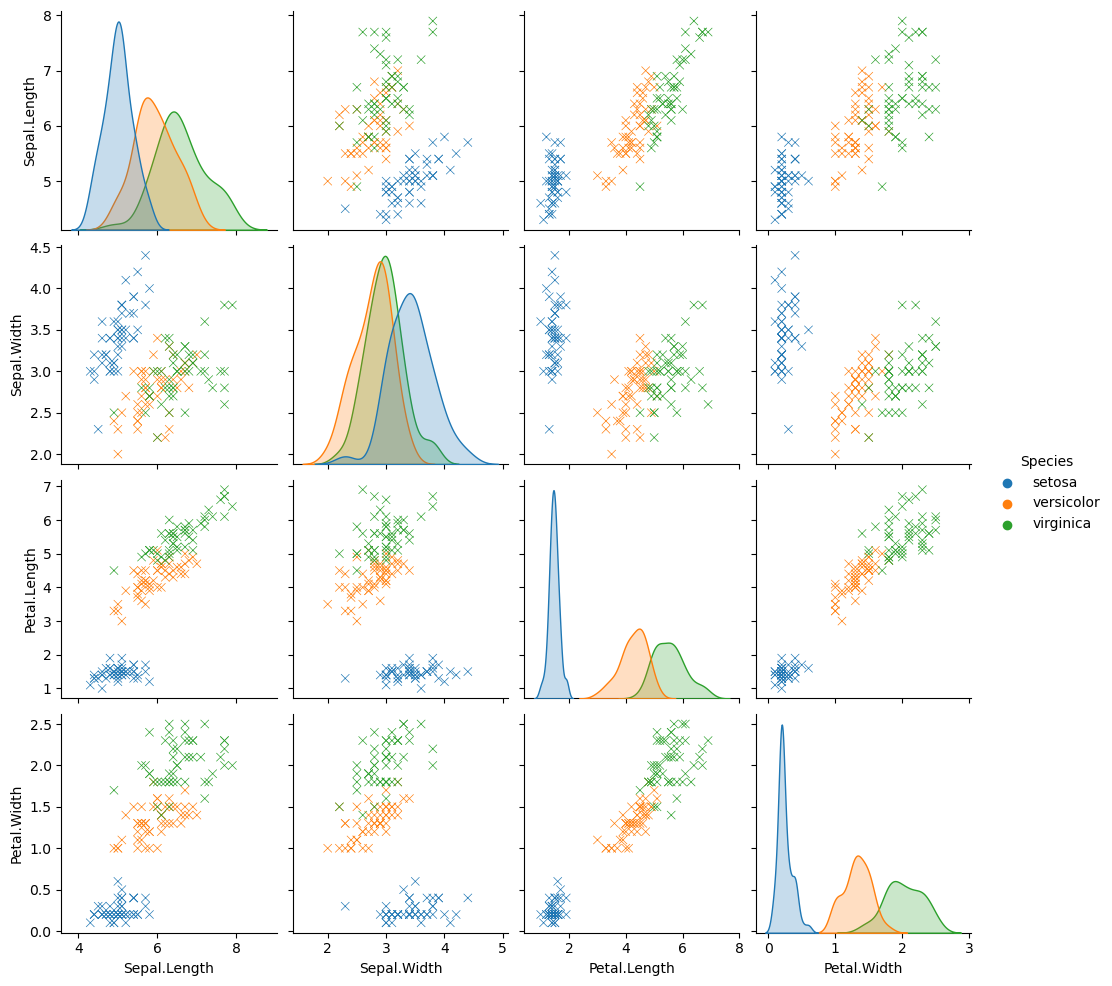

In [10]:
sns.pairplot(iris_df, hue = "Species",markers = "x")
plt.show()

In [43]:
# Check Correlation in Dataset
iris_df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,1.000000,-0.117570,0.871754,0.817941,0.782561
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
Petal.Length,0.871754,-0.428440,1.000000,0.962865,0.949035
Petal.Width,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


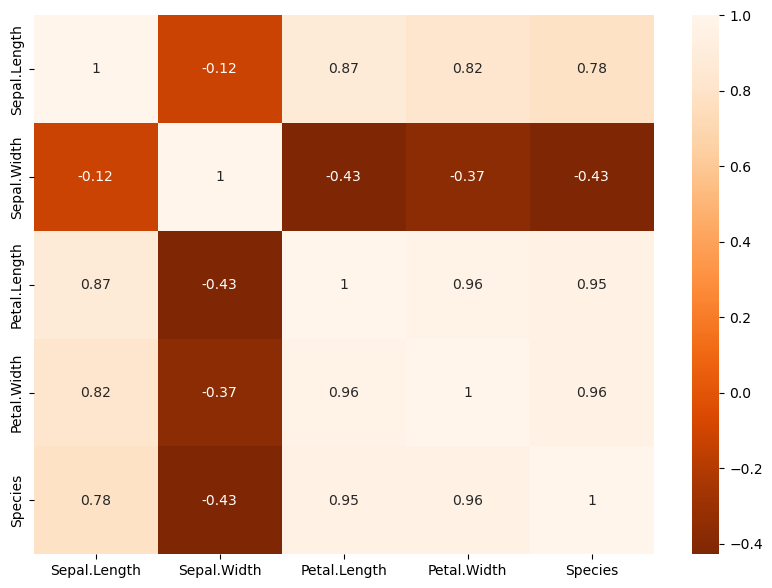

In [44]:
#Use Heatmap to see correlation.
plt.figure(figsize=(10,7))
sns.heatmap(iris_df.corr(),annot = True,cmap = "Oranges_r")
plt.show()

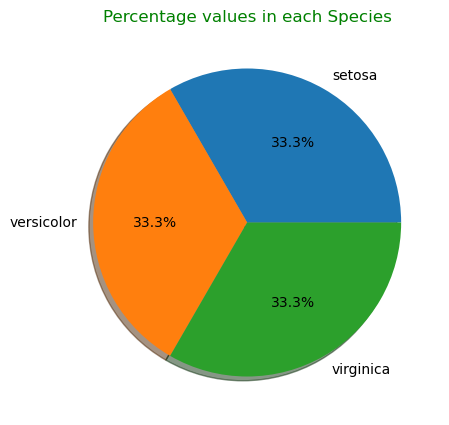

In [18]:
# Check value counts
iris_df["Species"].value_counts().plot(kind="pie",autopct = "%1.1f%%",shadow=True, figsize=(5,5))
plt.title("Percentage values in each Species", fontsize = 12 , c = "g")
plt.ylabel("",fontsize=10,c="r")
plt.show()

# Data Cleaning

In [21]:
# Change Categorical Data into numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df["Species"] = le.fit_transform(iris_df["Species"])
iris_df.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
iris_df['Species'].unique()

array([0, 1, 2])

In [23]:
X = iris_df.iloc[:,[0,1,2,3]]
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
y = iris_df.iloc[:, - 1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [32]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


# Model Building

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)
print("Logistic regression successfully implemented")
y_pred = lr.predict(X_test)
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:-")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is:-",accuracy*100)
print("Classification Report:-")
print(classification_report(y_test,y_pred))


Logistic regression successfully implemented
Confusion Matrix:-
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is:- 100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Random Forest Classifier


In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("Rndom Forest Classifier successfully Implimented")
y_pred = rfc.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)
#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

Rndom Forest Classifier successfully Implimented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy:-  96.66666666666667
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



# Decision Tree


In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print("Decision Tree Algorithm is successfully implimented.")
y_pred = dtree.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)
#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

Decision Tree Algorithm is successfully implimented.
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [36]:
from sklearn.tree import plot_tree

In [37]:
# for visualziing the Decision Tree
feature = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes = ['Iris-Setosa','Iris-Versicolor','Iris-Virginica']

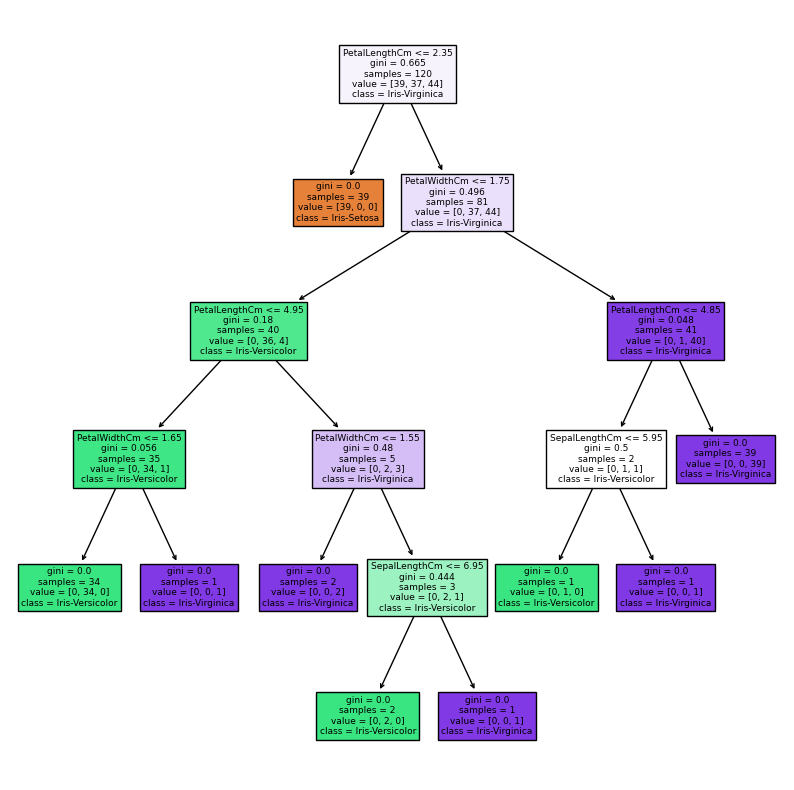

In [38]:
plt.figure(figsize=(10,10))
plot_tree(dtree, feature_names = feature, class_names = classes, filled = True);

# Support Vector Machine

In [39]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train, y_train)
print("Support vactor classifier is successfully implemented")
y_pred = svc.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)
#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

Support vactor classifier is successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# K - NN Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)
print("K-Nearest Neighbors classifier is successfully implemented")
y_pred = knn.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)
#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

K-Nearest Neighbors classifier is successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Naive Bayes is successfully implemented")
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)
# Accuracy test
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

Naive Bayes is successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  1]
 [ 0  0  5]]
accuracy:-  96.66666666666667
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



# Test Model

In [42]:
input_data=(4.9,3.0,1.4,0.2)
#changing the input data to a numpy array
input_data_as_nparray = np.asarray(input_data)
#reshape the data as we are predicting the label for only the instance
input_data_reshaped = input_data_as_nparray.reshape(1,-1)
prediction = dtree.predict(input_data_reshaped)
print("The category is",prediction)

The category is [0]
